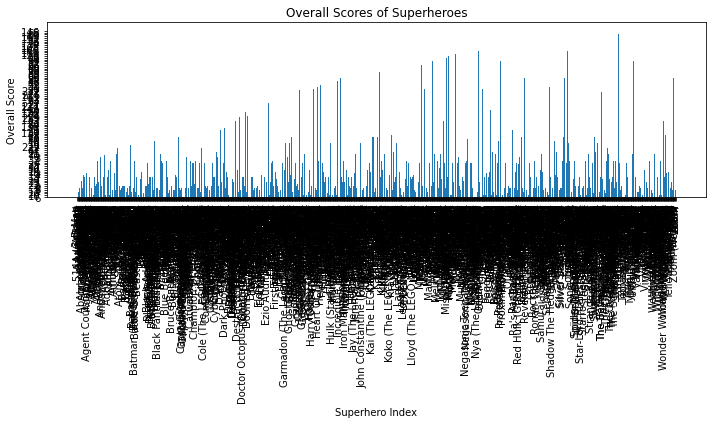

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("superheroes_nlp_dataset.csv")

# Create a bar plot with superhero names on the x-axis and overall scores on the y-axis
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(data.index, data['overall_score'])  # Using index as x-axis
plt.xlabel('Superhero Index')
plt.ylabel('Overall Score')
plt.title('Overall Scores of Superheroes')
plt.xticks(ticks=data.index, labels=data['name'], rotation=90)  # Set x-axis ticks as superhero names
plt.tight_layout()  # Adjust layout
plt.show()


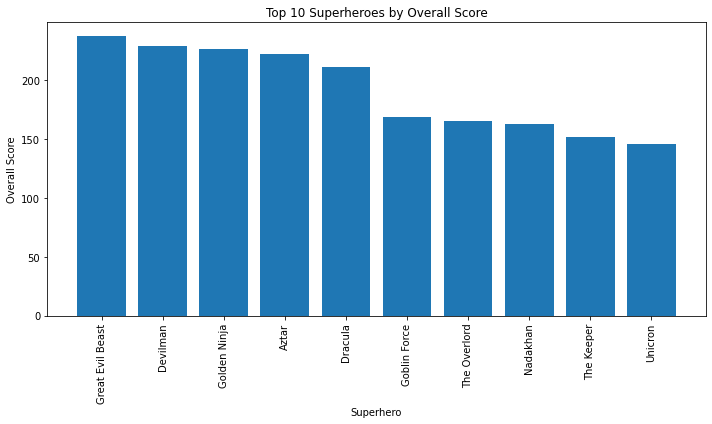

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("superheroes_nlp_dataset.csv")

# Convert 'overall_score' column to numeric (if it's not already)
data['overall_score'] = pd.to_numeric(data['overall_score'], errors='coerce')

# Drop rows with NaN values in 'overall_score' (if any)
data = data.dropna(subset=['overall_score'])

# Sort the data by 'overall_score' column in descending order and select the top 10
top_10 = data.nlargest(10, 'overall_score')

# Create a bar plot with the top 10 superheroes based on overall scores
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_10['name'], top_10['overall_score'])  # Using 'name' column as x-axis
plt.xlabel('Superhero')
plt.ylabel('Overall Score')
plt.title('Top 10 Superheroes by Overall Score')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()


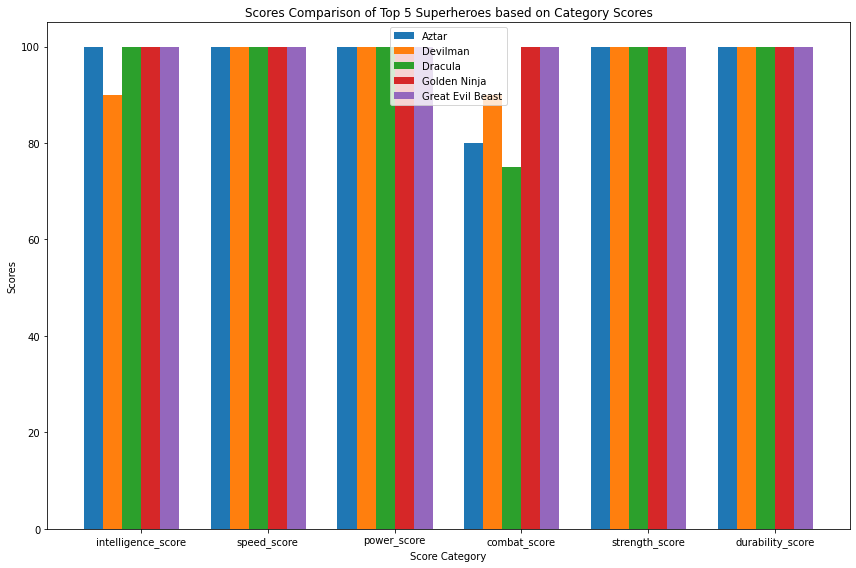

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file into a DataFrame
data = pd.read_csv("superheroes_nlp_dataset.csv")

# Replace non-numeric values like '∞' with NaN and convert score columns to numeric
score_columns = ['intelligence_score', 'speed_score', 'power_score', 'combat_score', 'strength_score', 'durability_score']
for col in score_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Sort the data by 'overall_score' column in descending order and select the top 5
data['overall_score'] = pd.to_numeric(data['overall_score'], errors='coerce')
data = data.dropna(subset=['overall_score'])
top_10_overall = data.nlargest(5, 'overall_score')

# Extract the top 10 superhero names based on overall score
top_10_names = top_10_overall['name']

# Extract scores for the top 10 superheroes in each category
top_10_scores = data[data['name'].isin(top_10_names)][['name'] + score_columns]

# Set up the data for plotting (transpose DataFrame)
top_10_scores.set_index('name', inplace=True)
top_10_scores = top_10_scores.transpose()

# Create a side-by-side bar plot for the top 10 superheroes in each category
plt.figure(figsize=(12, 8))  # Set the figure size

for i, superhero in enumerate(top_10_scores.columns):
    plt.bar(index + (bar_width * i), top_10_scores[superhero], width=bar_width, label=superhero)

plt.xlabel('Score Category')
plt.ylabel('Scores')
plt.title('Scores Comparison of Top 5 Superheroes based on Category Scores')
plt.xticks(index + (bar_width * 2.5), score_columns)  # Set x-axis ticks and labels with increased spacing
plt.legend()
plt.tight_layout()  # Adjust layout
plt.show()

